# <span style='color:#FE774C'>OBIS</span> Example Notebook

In [1]:
import odp

import warnings
warnings.filterwarnings("ignore")

In [2]:
db=odp.Database()
db_plt= odp.PlotTools()

In [3]:
db.datasets

,schema,table
name,,
World Ocean Database Casts,raw_wod,casts_temp
World Ocean Database Measurements,raw_wod,observations_temp
OBIS Biodiversity,raw_obis,occurrences
World Marine Heritage Sites,raw_marineregions,worldmarineheritagesites
World Seas IHO,raw_marineregions,world_seas_iho_v3
EEZ Land Union,raw_marineregions,eez_land_union_v3_202003
Intersect EEZ IHO,raw_marineregions,intersect_eez_iho_v4_2020
World EEZ,raw_marineregions,world_eez_v11_20191118
World Registry of Marine Species,raw_worms,taxa


## Pulling data - <span style='color:#FE774C'> **Ocean Biodiversity Information System** </span>


#### Insert the name of the table you are interested in into the query function, and let's limit to 10 just to see what it looks like

In [4]:
df=db.query('OBIS Biodiversity',
            date_from='2000-06-01',
            date_to='2000-08-31',
            limit=10)
df.head(3)

,id,decimalLongitude,decimalLatitude,geometry,timestamp,eventDate,eventTime,depth,date_year,month,...,higherClassification,scientificNameID,minimumDistanceAboveSurfaceInMeters,organismID,node_id,bibliographicCitation,institutionCode,recordedBy,datasetID,institutionID
0,96436288-1c42-49b9-bb69-84ff057fc149,-97.115556,27.885833,POINT (-97.11556 27.88583),2000-06-01,2000-06-01 07:28:00,None,0.65,2000,None,...,None,urn:lsid:marinespecies.org:taxname:159238,None,None,[b7c47783-a020-4173-b390-7b57c4fa1426],None,TPWD,None,TPWD_HARC_Texas_Aransas_Bay_Gill_Net,None
1,8d9feb2c-f3c2-42d1-8255-58770c47dde0,-96.841667,28.181944,POINT (-96.84167 28.18194),2000-06-01,2000-06-01 06:56:00,None,0.55,2000,None,...,None,urn:lsid:marinespecies.org:taxname:105792,None,None,[b7c47783-a020-4173-b390-7b57c4fa1426],None,TPWD,None,TPWD_HARC_Texas_San_Antonio_Bay_Gill_Net,None
2,86b6f088-e210-4731-8841-5dcb7e2187f8,-96.841667,28.181944,POINT (-96.84167 28.18194),2000-06-01,2000-06-01 06:56:00,None,0.55,2000,None,...,None,urn:lsid:marinespecies.org:taxname:422069,None,None,[b7c47783-a020-4173-b390-7b57c4fa1426],None,TPWD,None,TPWD_HARC_Texas_San_Antonio_Bay_Gill_Net,None


In [5]:
len(df.columns)

120

#### There are 120 columns so let's only pull the ones we are interested in
We can pass this into the data_columns input

In [6]:
cols_of_interest = ['id','geometry','timestamp', 'depth','date_year','month', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'scientificName']

In [7]:
df=db.query('OBIS Biodiversity', limit=10, data_columns=cols_of_interest)
df.head(3)

,id,geometry,timestamp,depth,date_year,month,kingdom,phylum,class,order,family,genus,species,scientificName
0,f1cb9aee-8bc9-4b01-8b2f-0229dd2e519c,POINT (9.50000 0.50000),2016-02-14,NaN,2016.0,None,Animalia,Chordata,Reptilia,Testudines,Cheloniidae,Eretmochelys,Eretmochelys imbricata,Eretmochelys imbricata
1,eed71485-b04e-426b-9348-501dd1387f15,POINT (-122.03855 36.58638),2020-02-10,NaN,2020.0,None,Animalia,Chordata,Mammalia,Cetartiodactyla,Delphinidae,Sousa,Sousa plumbea,Sousa plumbea
2,495e77cd-5e3d-4de9-8f2c-6053e403be88,POINT (18.85860 -34.15708),NaT,NaN,NaN,None,Chromista,Myzozoa,Dinophyceae,Gymnodiniales,Brachidiniaceae,Karenia,Karenia cristata,Karenia cristata


### Add <span style='color:#9D59F4'> **filters** </span> to the data pull


#### In this case we are interseted in the OBIS dataset for a specific species, the Mackerel (Scomber scombrus)
#### Using the filter function, you can create filters for whichever column of the dataset you are interested in. 

Let's define the filters:


In [9]:
filter1 = db.filter_data('scientificName', '=', 'Scomber scombrus')
filter2 = db.filter_data("depth", "<", '50')

And now let's pass into our query function

In [10]:
df=db.query('OBIS Biodiversity',
            filters=[filter1, filter2], limit=100, data_columns=cols_of_interest)

In [11]:
df.head()

,id,geometry,timestamp,depth,date_year,month,kingdom,phylum,class,order,family,genus,species,scientificName
0,fffdfb15-2e6d-4971-9515-1608bfb8d997,POINT (4.04500 53.34280),2011-08-16,28.0,2011,8,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus
1,fffd6601-5ff1-49a5-8ff0-d55727de5034,POINT (3.40000 52.68330),1999-08-20,30.0,1999,8,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus
2,fff54553-206a-446a-ae67-91928e653774,POINT (4.83330 54.75000),2001-08-13,44.0,2001,8,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus
3,fff28741-4294-4e84-883d-623e698a7e0c,POINT (2.11670 51.53330),1992-08-26,41.0,1992,8,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus
4,ffe5ed1a-b7c2-4cd0-872a-10050da56a67,POINT (4.48330 55.76670),1995-08-15,43.0,1995,8,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus


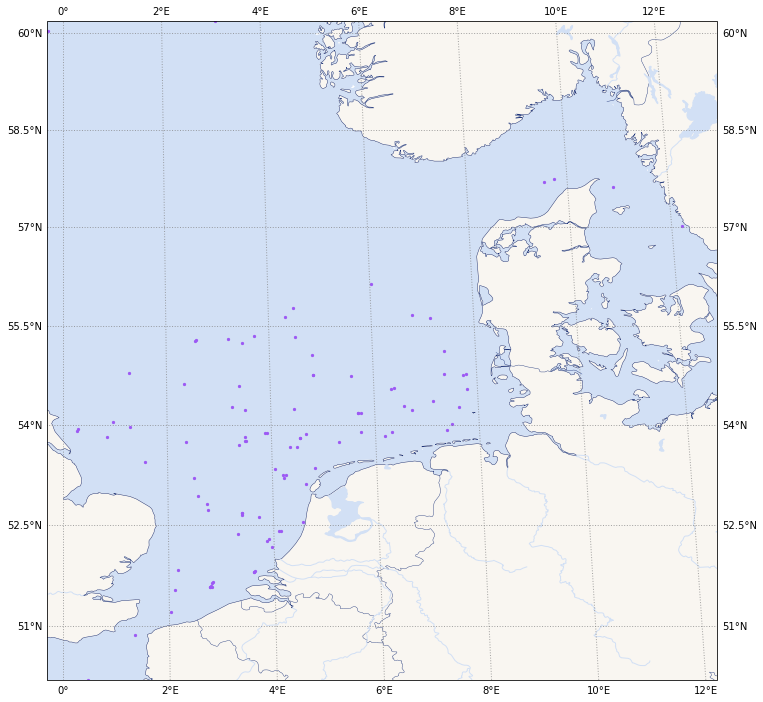

In [12]:
db_plt.plot_points(df)

### Look for OBIS data in a specific <span style='color:#9D59F4'> **polygon** </span>

Let's define our polygon

In [14]:
poly= 'POLYGON ((3.0 51.0, 20 51, 20 80, 3 80, 3 51))' ## you can also always pass in a shapely polygon if you want
filter1 = db.filter_data('scientificName', '=', 'Scomber scombrus')


In [15]:
df=db.query('OBIS Biodiversity',
            poly=poly, filters=[filter1], limit=100)

In [16]:
df.head()

,id,decimalLongitude,decimalLatitude,geometry,timestamp,eventDate,eventTime,depth,date_year,month,...,higherClassification,scientificNameID,minimumDistanceAboveSurfaceInMeters,organismID,node_id,bibliographicCitation,institutionCode,recordedBy,datasetID,institutionID
0,fffdfb15-2e6d-4971-9515-1608bfb8d997,4.0450,53.3428,POINT (4.04500 53.34280),2011-08-16,2011-08-16T09:10:00+00:00,09:10:00+00:00,28.0,2011,8,...,None,urn:lsid:marinespecies.org:taxname:127023,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],North Sea International Bottom Trawl Survey,ICES,North Sea International Bottom Trawl Survey,https://marineinfo.org/id/dataset/2763,None
1,fffd6601-5ff1-49a5-8ff0-d55727de5034,3.4000,52.6833,POINT (3.40000 52.68330),1999-08-20,1999-08-20T10:01:00+00:00,10:01:00+00:00,30.0,1999,8,...,None,urn:lsid:marinespecies.org:taxname:127023,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],North Sea International Bottom Trawl Survey,ICES,North Sea International Bottom Trawl Survey,https://marineinfo.org/id/dataset/2763,None
2,fff54553-206a-446a-ae67-91928e653774,4.8333,54.7500,POINT (4.83330 54.75000),2001-08-13,2001-08-13T05:40:00+00:00,05:40:00+00:00,44.0,2001,8,...,None,urn:lsid:marinespecies.org:taxname:127023,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],North Sea International Bottom Trawl Survey,ICES,North Sea International Bottom Trawl Survey,https://marineinfo.org/id/dataset/2763,None
3,fff4856c-b3b7-4527-bd4b-50930bdec00c,10.8167,58.6667,POINT (10.81670 58.66670),1992-09-08,1992-09-08T05:26:00+00:00,05:26:00+00:00,87.0,1992,9,...,None,urn:lsid:marinespecies.org:taxname:127023,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],North Sea International Bottom Trawl Survey,ICES,North Sea International Bottom Trawl Survey,https://marineinfo.org/id/dataset/2763,None
4,fff36e7b-2466-4fba-bda5-9743a334c5a9,3.1833,59.7000,POINT (3.18330 59.70000),1998-01-27,1998-01-27T13:45:00+00:00,13:45:00+00:00,157.0,1998,1,...,None,urn:lsid:marinespecies.org:taxname:127023,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],North Sea International Bottom Trawl Survey,ICES,North Sea International Bottom Trawl Survey,https://marineinfo.org/id/dataset/2763,None


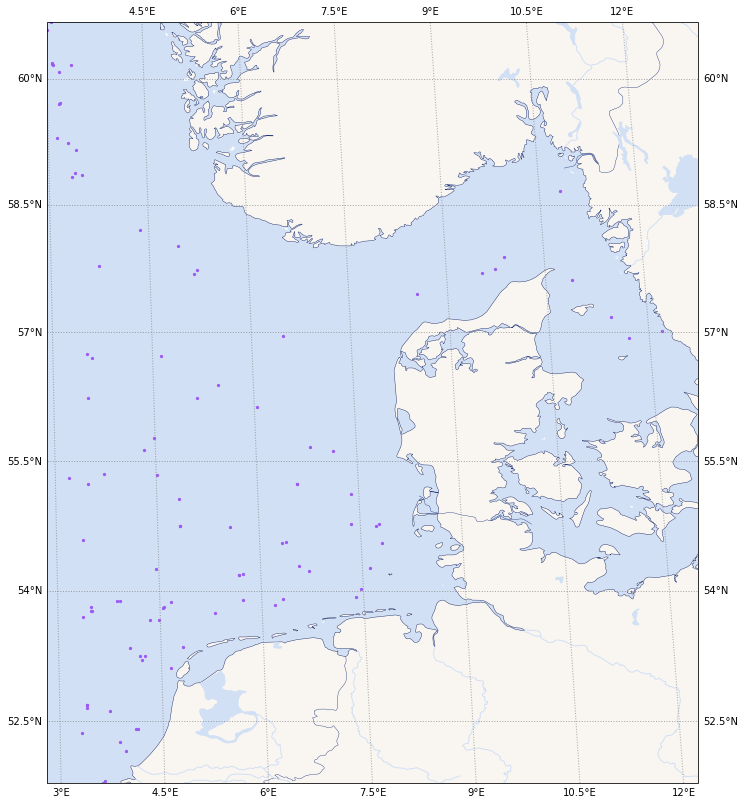

In [17]:
db_plt.plot_points(df)

#### We can also create an interactive plot (will show only when cell is run)

In [ ]:
db.plot(df_meas, col='depth' )